In [121]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [122]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [123]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [124]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [125]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [126]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [127]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [128]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [129]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [130]:
#getting column names for Station table
columns_Station = inspector.get_columns('Station')

for column in columns_Station:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [131]:
#getting column names for Measurement table
columns_Measurement = inspector.get_columns('Measurement')

for column in columns_Measurement:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [132]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Date of last record
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

for _ in end_date:
    end_date = _
    
end_date

'2017-08-23'

In [133]:
#converting end_date to datetime format

from datetime import datetime

end_date = datetime.strptime(end_date, '%Y-%m-%d')

end_date

datetime.datetime(2017, 8, 23, 0, 0)

In [134]:
# Calculate the date 1 year ago from the last data point in the database
#12 months before the last record

start_date = end_date - dt.timedelta(days=365)

print(start_date)

2016-08-23 00:00:00


In [135]:
# Perform a query to retrieve the data and precipitation scores
#ppt data in the last 12 months sorted in ascending order (default)
ppt_data = session.query(Measurement.prcp, Measurement.date).filter(
    Measurement.date >= start_date).order_by(Measurement.date)

for record in ppt_data:
    print(record)

(0.08, '2016-08-24')
(2.15, '2016-08-24')
(2.28, '2016-08-24')
(None, '2016-08-24')
(1.22, '2016-08-24')
(2.15, '2016-08-24')
(1.45, '2016-08-24')
(0.08, '2016-08-25')
(0.08, '2016-08-25')
(0.0, '2016-08-25')
(0.0, '2016-08-25')
(0.21, '2016-08-25')
(0.06, '2016-08-25')
(0.11, '2016-08-25')
(0.0, '2016-08-26')
(0.03, '2016-08-26')
(0.02, '2016-08-26')
(0.04, '2016-08-26')
(0.0, '2016-08-26')
(0.01, '2016-08-26')
(0.0, '2016-08-27')
(0.18, '2016-08-27')
(0.02, '2016-08-27')
(0.0, '2016-08-27')
(0.12, '2016-08-27')
(None, '2016-08-27')
(0.01, '2016-08-28')
(0.14, '2016-08-28')
(0.14, '2016-08-28')
(0.14, '2016-08-28')
(0.6, '2016-08-28')
(2.07, '2016-08-28')
(0.0, '2016-08-29')
(0.17, '2016-08-29')
(0.04, '2016-08-29')
(None, '2016-08-29')
(0.0, '2016-08-29')
(0.35, '2016-08-29')
(0.9, '2016-08-29')
(0.0, '2016-08-30')
(0.0, '2016-08-30')
(0.02, '2016-08-30')
(0.0, '2016-08-30')
(0.0, '2016-08-30')
(0.05, '2016-08-30')
(0.13, '2016-08-31')
(0.1, '2016-08-31')
(None, '2016-08-31')
(None, 

(0.0, '2016-11-02')
(0.0, '2016-11-02')
(0.0, '2016-11-02')
(0.0, '2016-11-02')
(0.0, '2016-11-02')
(0.04, '2016-11-02')
(0.0, '2016-11-03')
(0.0, '2016-11-03')
(0.0, '2016-11-03')
(0.0, '2016-11-03')
(0.0, '2016-11-03')
(0.02, '2016-11-03')
(0.0, '2016-11-04')
(0.0, '2016-11-04')
(0.0, '2016-11-04')
(None, '2016-11-04')
(0.0, '2016-11-04')
(0.0, '2016-11-04')
(0.06, '2016-11-04')
(0.0, '2016-11-05')
(0.02, '2016-11-05')
(0.0, '2016-11-05')
(0.02, '2016-11-05')
(0.03, '2016-11-05')
(0.38, '2016-11-05')
(0.0, '2016-11-06')
(0.02, '2016-11-06')
(0.0, '2016-11-06')
(0.0, '2016-11-06')
(0.01, '2016-11-06')
(0.05, '2016-11-06')
(0.0, '2016-11-07')
(0.0, '2016-11-07')
(0.13, '2016-11-07')
(None, '2016-11-07')
(0.0, '2016-11-07')
(0.0, '2016-11-07')
(0.05, '2016-11-07')
(0.07, '2016-11-08')
(0.14, '2016-11-08')
(0.02, '2016-11-08')
(0.15, '2016-11-08')
(0.21, '2016-11-08')
(0.53, '2016-11-08')
(0.0, '2016-11-09')
(0.08, '2016-11-09')
(0.17, '2016-11-09')
(0.0, '2016-11-09')
(0.0, '2016-11-09'

(0.0, '2017-01-27')
(0.0, '2017-01-27')
(0.03, '2017-01-27')
(0.03, '2017-01-27')
(0.0, '2017-01-28')
(0.14, '2017-01-28')
(0.0, '2017-01-28')
(0.0, '2017-01-28')
(0.0, '2017-01-28')
(0.18, '2017-01-29')
(0.0, '2017-01-29')
(None, '2017-01-29')
(0.26, '2017-01-29')
(0.55, '2017-01-29')
(0.0, '2017-01-30')
(0.0, '2017-01-30')
(None, '2017-01-30')
(0.05, '2017-01-30')
(0.0, '2017-01-30')
(0.0, '2017-01-30')
(0.0, '2017-01-30')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-01-31')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-01')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-02')
(0.0, '2017-02-03')
(0.0, '2017-02-03')
(0.0, '2017-02-03')
(0.0, '2017-02-03')
(0.0, '2017-02-03')
(0.0, '2017-02-03')
(0.0, '2017-02-04')
(0.0, '2017

(0.0, '2017-07-09')
(0.0, '2017-07-10')
(0.0, '2017-07-10')
(0.0, '2017-07-10')
(None, '2017-07-10')
(0.0, '2017-07-10')
(0.02, '2017-07-10')
(0.02, '2017-07-10')
(0.0, '2017-07-11')
(0.01, '2017-07-11')
(0.0, '2017-07-11')
(None, '2017-07-11')
(0.0, '2017-07-11')
(0.02, '2017-07-11')
(0.0, '2017-07-11')
(0.0, '2017-07-12')
(0.01, '2017-07-12')
(0.02, '2017-07-12')
(None, '2017-07-12')
(0.0, '2017-07-12')
(0.28, '2017-07-12')
(0.05, '2017-07-12')
(0.07, '2017-07-13')
(0.33, '2017-07-13')
(0.3, '2017-07-13')
(None, '2017-07-13')
(0.11, '2017-07-13')
(0.32, '2017-07-13')
(0.68, '2017-07-13')
(0.02, '2017-07-14')
(0.05, '2017-07-14')
(0.0, '2017-07-14')
(0.0, '2017-07-14')
(0.2, '2017-07-14')
(0.68, '2017-07-14')
(0.0, '2017-07-15')
(0.03, '2017-07-15')
(0.01, '2017-07-15')
(0.0, '2017-07-15')
(0.05, '2017-07-15')
(0.1, '2017-07-15')
(0.02, '2017-07-16')
(0.07, '2017-07-16')
(0.12, '2017-07-16')
(0.0, '2017-07-16')
(0.1, '2017-07-16')
(0.5, '2017-07-16')
(0.03, '2017-07-17')
(0.12, '2017-

In [168]:
#loading the query into pandas dataframe
ppt_df = pd.DataFrame(ppt_data, columns = ['Precipitation(inches)', 'Date'])

ppt_df = ppt_df.set_index('Date')

ppt_df

,Precipitation(inches)
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


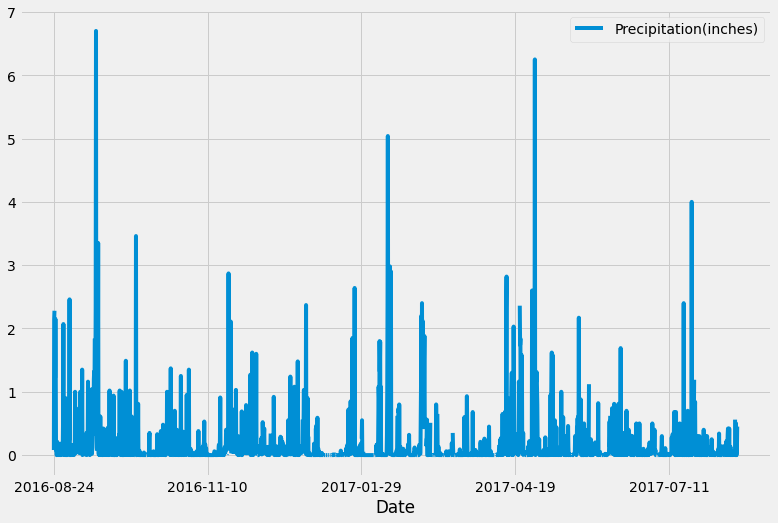

In [183]:
# Using Pandas Plotting with Matplotlib to plot the data

plot = ppt_df.plot(figsize=(12,8))

plt.savefig("Precipitation_analyis.png")

In [184]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ppt_df.describe()

,Precipitation(inches)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [187]:
## Station Analysis
# Design a query to show how many stations are available in this dataset?

stations_count = session.query(Station.id).count()
print(f'Total number of stations = {stations_count}')

Total number of stations = 9


In [214]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_names = []

stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
            
for station in stations:
    print(station)

station_highest_obs = stations[0][0]

print(f'\n Station {station_highest_obs} has the highest number of observations')

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)

 Station USC00519281 has the highest number of observations


In [228]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_highest_obs).all()

lowest_temp [0][0]

54.0

In [230]:
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_highest_obs).all()
highest_temp[0][0]


85.0

In [236]:
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_highest_obs).all()
\n
avg_temp[0][0]

71.66378066378067

In [245]:
print(f' At the station with highest number of observations: \
      \n Lowest temperature recorded was {lowest_temp[0][0]}\
      \n Highest temperature recorded was {highest_temp[0][0]}\
      \n Average temperature recorded was {avg_temp[0][0]}')

 At the station with highest number of observations:       
 Lowest temperature recorded was 54.0      
 Highest temperature recorded was 85.0      
 Average temperature recorded was 71.66378066378067


In [275]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_data = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
        filter(Measurement.station == station_highest_obs).\
        filter(Measurement.date >= start_date).\
        group_by(Measurement.date).\
        order_by(Measurement.date)

for record in tobs_data:
    print(record)

(77.0, 1)
(80.0, 1)
(80.0, 1)
(75.0, 1)
(73.0, 1)
(78.0, 1)
(77.0, 1)
(78.0, 1)
(80.0, 1)
(80.0, 1)
(78.0, 1)
(78.0, 1)
(78.0, 1)
(73.0, 1)
(74.0, 1)
(80.0, 1)
(79.0, 1)
(77.0, 1)
(80.0, 1)
(76.0, 1)
(79.0, 1)
(75.0, 1)
(79.0, 1)
(78.0, 1)
(79.0, 1)
(78.0, 1)
(78.0, 1)
(76.0, 1)
(74.0, 1)
(77.0, 1)
(78.0, 1)
(79.0, 1)
(79.0, 1)
(77.0, 1)
(80.0, 1)
(78.0, 1)
(78.0, 1)
(78.0, 1)
(77.0, 1)
(79.0, 1)
(79.0, 1)
(79.0, 1)
(79.0, 1)
(75.0, 1)
(76.0, 1)
(73.0, 1)
(72.0, 1)
(71.0, 1)
(77.0, 1)
(79.0, 1)
(78.0, 1)
(79.0, 1)
(77.0, 1)
(79.0, 1)
(77.0, 1)
(78.0, 1)
(78.0, 1)
(78.0, 1)
(78.0, 1)
(77.0, 1)
(74.0, 1)
(75.0, 1)
(76.0, 1)
(73.0, 1)
(76.0, 1)
(74.0, 1)
(77.0, 1)
(76.0, 1)
(76.0, 1)
(74.0, 1)
(75.0, 1)
(75.0, 1)
(75.0, 1)
(75.0, 1)
(71.0, 1)
(63.0, 1)
(70.0, 1)
(68.0, 1)
(67.0, 1)
(77.0, 1)
(74.0, 1)
(77.0, 1)
(76.0, 1)
(76.0, 1)
(75.0, 1)
(76.0, 1)
(75.0, 1)
(73.0, 1)
(75.0, 1)
(73.0, 1)
(75.0, 1)
(74.0, 1)
(75.0, 1)
(74.0, 1)
(75.0, 1)
(73.0, 1)
(75.0, 1)
(73.0, 1)
(73.0, 1)
(74.0, 1)


In [276]:
#loading the query into pandas dataframe
tobs_df = pd.DataFrame(tobs_data, columns = ['Temperature', 'Frequency'])

tobs_df = tobs_df.sort_values('Temperature').set_index('Frequency')

tobs_df

,Temperature
Frequency,
1,59.0
1,59.0
1,59.0
1,60.0
1,60.0
...,...
1,81.0
1,82.0
1,82.0


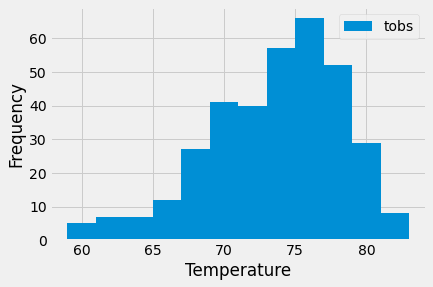

In [280]:
#Histogram

plt.hist(tobs_df['Temperature'],12, label="tobs")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend()
plt.savefig("Station_analysis.png")
plt.show()

## Bonus Challenge Assignment

In [148]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [149]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [150]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [151]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [152]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [153]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [154]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [155]:
# Plot the daily normals as an area plot with `stacked=False`
